# Interpolación polinomial en la forma de Lagrange

Dado un conjunto de $k+1$ puntos

$$(x_0,y_0),\ldots,(x_j,y_j),\ldots,(x_k,y_k)$$

donde las $x_j$ no son iguales, la interpolación polinomial en la forma de Lagrange es una combinación lineal

$$L(x):= \sum_{j=0}^{k}y_jl_j(x)$$

de las bases polinomiales de Lagrange

$$l_j(x) = \prod_{0 \le m \le k \atop m \ne j} \frac{x-x_m}{x_j-x_m}.$$

Para cada $i \ne j$, $l_j(x)$ incluye el término $(x-x_i)$ en el numerador, entonces el producto entero será cero en $x=x_i$:

$$l_{j\ne i}(x_i) = \prod_{m \ne j} \frac{x_i-x_m}{x_j-x_m} = \frac{x_i-x_0}{x_j-x_0} \ldots \frac{x_i-x_i}{x_j-x_i} \ldots \frac{x_i-x_k}{x_j-x_k} = 0.$$

Por otro lado

$$l_i(x_i) = \prod_{m \ne i} \frac{x_i-x_m}{x_i-x_m} = 1,$$

en otras palabras, todas las bases polinomiales son cero en $x=x_i$, excepto $l_i(x_i)$, para la cual se tiene $l_i(x_i)=1$. Lo que sigue es que $y_il_i(x_i) = y_i$, entonces para cada punto $x_i$, $L(x_i) = y_i+0+0+\ldots+0 = y_i$, demostrando que $L$ interpola a la función de manera exacta.

In [26]:
listx = [1,5,-2];

In [27]:
listy = [2,7,8];

In [3]:
using PyPlot

INFO: Installing PyQt5 via Anaconda's /home/david/anaconda3/bin/conda...


Fetching package metadata .........
Solving package specifications: .

# All requested packages already installed.
# packages in environment at /home/david/anaconda3:
#
pyqt                      4.11.4                   py35_4  


In [4]:
using SymPy

In [29]:
function base_lagrange(j,listx,x)
    l=1
    for i = 1:length(listx)
         if i != j
            l = l*(x-listx[i])/(listx[j]-listx[i])
         end
    end
    return l
end

base_lagrange (generic function with 1 method)

In [51]:
function Lagrange(listx,listy,x)
    L=0
    for i in 1:length(listy)
       L = L + base_lagrange(i,listx,x)*listy[i]
    end
    return L
end

Lagrange (generic function with 2 methods)

In [52]:
Lagrange(listx,listy,0.1)

2.9225000000000003

In [59]:
L(x)=Lagrange(listx,listy,x)

L (generic function with 1 method)

In [62]:
x=linspace(-3,6,1000);
y=L.(x);

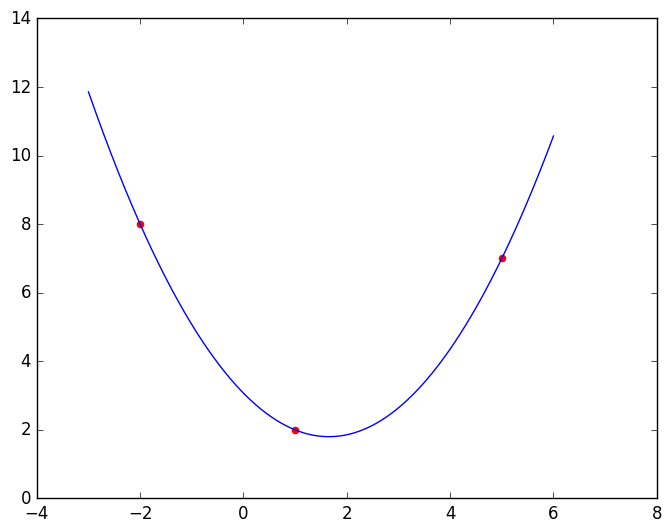

In [63]:
scatter(listx,listy,color="red")
plot(x,y)
show()

In [65]:
expand(Lagrange(listx,listy,Sym("x")))

    2            
13⋅x    43⋅x   43
───── - ──── + ──
  28     28    14